In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('D:/College/EDA project/uber.csv')

In [6]:
df.shape

(200000, 9)

In [7]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [9]:
missing_value = df.isnull().sum() # Finding missing values
missing_value

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
data_types = df.dtypes
data_types

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [11]:
unique_counts = df.nunique()
unique_counts

Unnamed: 0           200000
key                    3600
fare_amount            1240
pickup_datetime      196629
pickup_longitude      71014
pickup_latitude       83773
dropoff_longitude     76836
dropoff_latitude      90526
passenger_count           8
dtype: int64

In [12]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [15]:
unique_counts = df['passenger_count'].unique() #Number of unique values in the passenger_count col
print(unique_counts)

[  1   3   5   2   4   6   0 208]


In [16]:
from scipy import stats


In [17]:
#Z-score to identify and removal of outliers
z_score = np.abs(stats.zscore(df['passenger_count']))
threshold = 3
df_no_outlier = df[z_score < threshold]

In [18]:
df.shape

(200000, 9)

In [19]:
df_no_outlier.shape

(195728, 9)

In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\Admin\AppData\Local\Temp\ipykernel_25152\2763698898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier['pickup_datetime'] = pd.to_datetime(df_no_outlier['pickup_datetime'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_25152\2763698898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier['pickup_year'] = df_no_outlier['pickup_datetime'].dt.year
C:\Users\Admin\AppData\Local\Temp\ipykernel_25152\2763698898.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy 

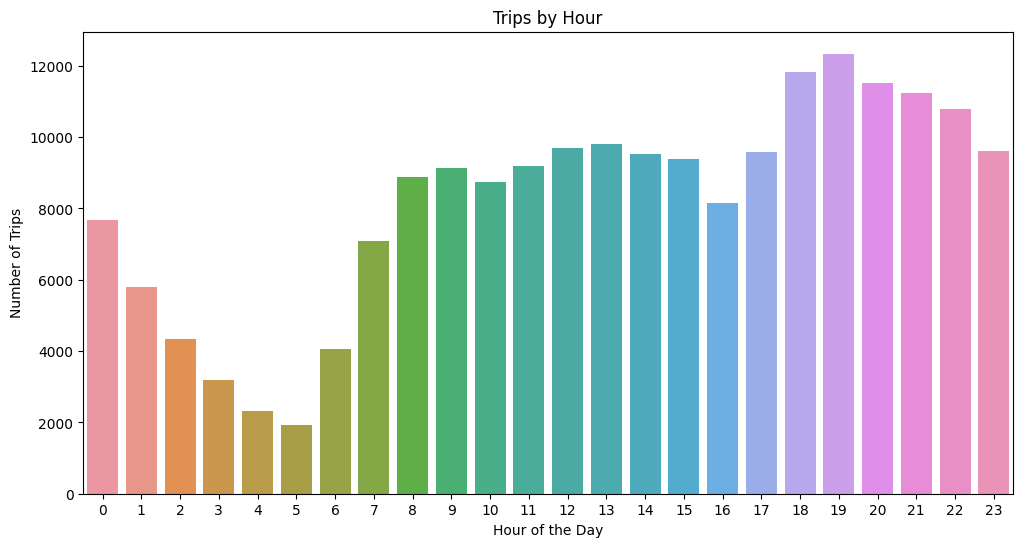

In [22]:
#Time based analysis
df_no_outlier['pickup_datetime'] = pd.to_datetime(df_no_outlier['pickup_datetime'])

# Extracting the date and time components
df_no_outlier['pickup_year'] = df_no_outlier['pickup_datetime'].dt.year
df_no_outlier['pickup_month'] = df_no_outlier['pickup_datetime'].dt.month
df_no_outlier['pickup_day'] = df_no_outlier['pickup_datetime'].dt.day
df_no_outlier['pickup_hour'] = df_no_outlier['pickup_datetime'].dt.hour

# Visualizing the number of trips by hour
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_hour', data=df_no_outlier)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour')
plt.show()

In [23]:
#Year wise earning
df_no_outlier['pickup_datetime'] = pd.to_datetime(df_no_outlier['pickup_datetime'])
df_no_outlier['pickup_year'] = df_no_outlier['pickup_datetime'].dt.year

yearly_earnings = df_no_outlier.groupby('pickup_year')['fare_amount'].sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_25152\3055747184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier['pickup_datetime'] = pd.to_datetime(df_no_outlier['pickup_datetime'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_25152\3055747184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier['pickup_year'] = df_no_outlier['pickup_datetime'].dt.year


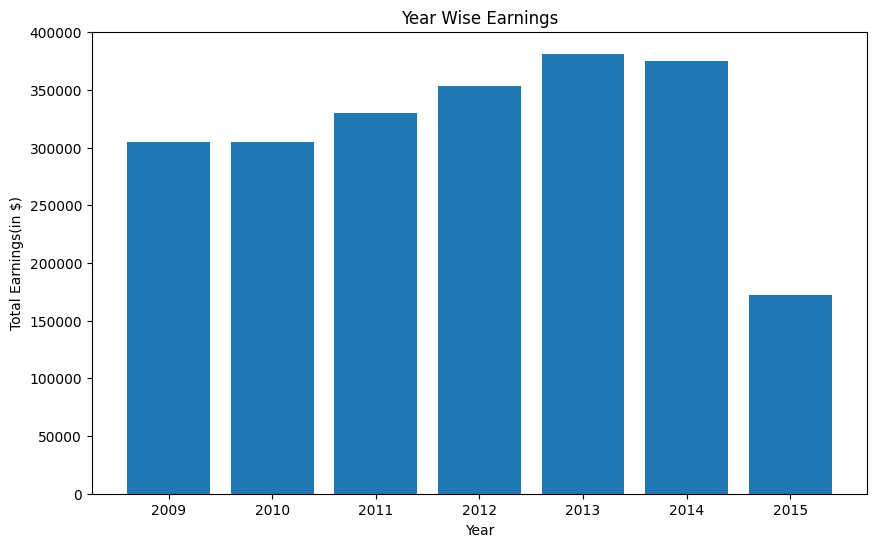

In [25]:
# Plot Year Wise Earnings
plt.figure(figsize=(10, 6))
plt.bar(yearly_earnings.index, yearly_earnings.values)
plt.xlabel('Year')
plt.ylabel('Total Earnings(in $)')
plt.title('Year Wise Earnings')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_25152\2470980939.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrx = df_no_outlier.corr() #correlation matrix


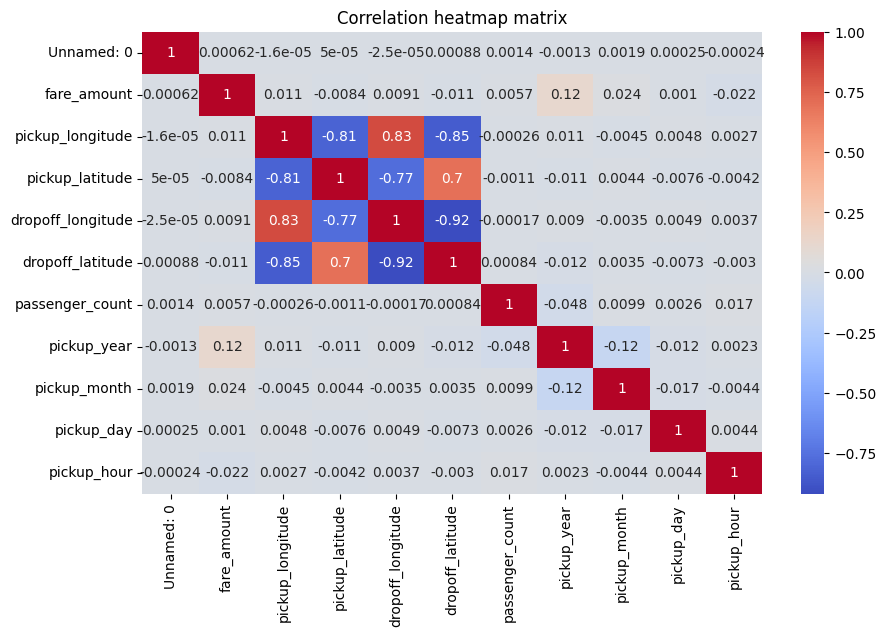

In [27]:
#HEat-Map using seaborn

corr_matrx = df_no_outlier.corr() #correlation matrix

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrx, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap matrix')
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

In [30]:
std_scaler = StandardScaler()
df_no_outlier['fare_amount_stdscl']= std_scaler.fit_transform(df_no_outlier['fare_amount'].values.reshape(-1,1))

C:\Users\Admin\AppData\Local\Temp\ipykernel_25152\408350433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier['fare_amount_stdscl']= std_scaler.fit_transform(df_no_outlier['fare_amount'].values.reshape(-1,1))


In [31]:
df_no_outlier.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,fare_amount_stdscl
0,24238194,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,-0.388314
1,27835199,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,-0.368103
2,44984355,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,0.157393
3,25894730,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,-0.610640
4,17610152,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,0.470670


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [37]:
X = df_no_outlier[['passenger_count']]
y = df_no_outlier['fare_amount'].values.reshape(-1,1)


X_train ,X_test, y_Train, y_test = train_test_split(X,y, test_size=0.2 ,random_state= 42)

model = LinearRegression()

model.fit(X_train, y_Train)

y_pred = model.predict(X_test)

In [38]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squred error", mse)

r2 = r2_score(y_test, y_pred)
print("R2-score", r2)

rmse = sqrt(mse)
print('Root mean squared error', rmse)

Mean squred error 96.39567034693773
R2-score 7.706099937165867e-05
Root mean squared error 9.81812967662058
